In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('training-titanic-x-y-train.csv')
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [4]:
x = df[['Pclass', 'Sex', 'Age', 'Fare','Survived']]
x.head()

,Pclass,Sex,Age,Fare,Survived
0,2,female,29.0,26.000,1
1,3,male,NaN,8.050,0
2,2,male,39.0,26.000,0
3,3,female,29.0,21.075,0
4,3,male,25.0,7.050,0


In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
x['Sex'] = encode.fit_transform(x['Sex'])

In [6]:
x.head()
x.dropna(inplace = True)
x.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x.drop(['Survived'],axis =1),x.Survived.values,test_size=0.3)

In [8]:
from sklearn.svm import SVC
svm = SVC(C=10, kernel='linear')

In [9]:
svm.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = svm.predict(X_test)

In [11]:
svm.score(X_test,y_test)

0.7950310559006211

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 11],
       [22, 43]])

Text(69.0, 0.5, 'Truth')

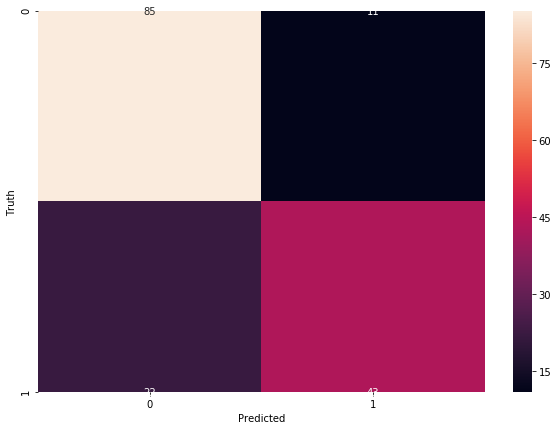

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')